In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

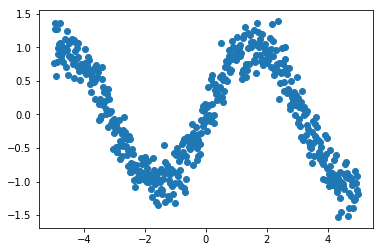

In [67]:
np.random.seed(20180824)
m = 500

x = np.linspace(-5, 5, m).reshape(m,1)
y = np.sin(x) + np.random.randn(m,1)*0.2

_ = plt.scatter(x, y)

In [81]:
def loss_func(X, y, theta):
    loss = np.dot(X, theta) - y
    ridge = np.dot(theta, theta)
    return 1./(2*m) * np.dot(loss.T, loss) + ridge

def grad_func(X, y, theta):
    loss = np.dot(X, theta) - y
    return 1./m * np.dot(X.T, loss) + 2*theta

In [82]:
def X_poly(x, n):
    tx = x
    X = np.zeros((m, n+1))
    for i in range(n+1):
        X[:,i] = tx.reshape(m)
        tx = tx*x
    return X

[[ -4.71448436e-04]
 [ -1.62764836e-04]
 [ -1.87982941e-02]
 [ -3.81201427e-03]
 [ -4.13326064e-01]]
[[  9.35147051e-01]
 [  8.24727095e-03]
 [  1.82328222e+01]
 [  1.60025184e-01]
 [  3.74333513e+02]]
[[ -8.47011979e+02]
 [ -3.54536255e-01]
 [ -1.65317606e+04]
 [ -6.92091338e+00]
 [ -3.39455765e+05]]
[[  7.68093668e+05]
 [  1.53253390e+01]
 [  1.49914277e+07]
 [  2.99111142e+02]
 [  3.07827194e+08]]
[[ -6.96527037e+08]
 [ -6.62344745e+02]
 [ -1.35946111e+10]
 [ -1.29273317e+04]
 [ -2.79145595e+11]]
[[  6.31628582e+11]
 [  2.86259757e+04]
 [  1.23279420e+13]
 [  5.58708144e+05]
 [  2.53136385e+14]]
[[ -5.72776999e+14]
 [ -1.23718804e+06]
 [ -1.11792940e+16]
 [ -2.41468669e+07]
 [ -2.29550567e+17]]
[[  5.19408874e+17]
 [  5.34679737e+07]
 [  1.01376706e+19]
 [  1.04358507e+09]
 [  2.08162342e+20]]
[[ -4.71013290e+20]
 [ -2.31121603e+09]
 [ -9.19309971e+21]
 [ -4.50771050e+10]
 [ -1.88766951e+23]]
[[  4.27126932e+23]
 [  9.94993870e+10]
 [  8.33653861e+24]
 [  1.93955237e+12]
 [  1.71178

C:\Users\phart\Anaconda3\envs\mytf\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
[[ nan]
 [ nan]


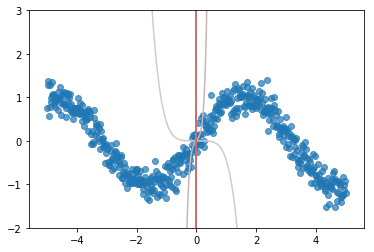

In [89]:
np.random.seed(20180824)

n = 4
alpha = 0.001
accuracy = 1e-2

i = 1
index = 1
c = np.array([0.8, 0.8, 0.8])
X = X_poly(x, n)
theta = np.random.randn(n+1, 1)*0.00001
grad = grad_func(X, y, theta)
while not np.all(abs(grad) <= accuracy):
    theta = theta - alpha*grad
    grad = grad_func(X, y, theta)
    print(theta)
    i = i+1
    if i > 1e3:
        break
    if i%index == 0:
        _ = plt.plot(x, np.dot(X, theta), color=c)
        index = index*3
        c = c - [0, 0.1, 0.1]
_ = plt.scatter(x, y, alpha=0.7)
_ = plt.ylim(-2, 3)